In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from matplotlib import rc, rcParams

from scipy.optimize import curve_fit
import matplotlib as mpl
from matplotlib import rc, rcParams


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

In [4]:
# read the .out files and get Cv values
Cvs_dft = []
gauss_outs = []
output_counter = 0
Cvs_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_Cvs = os.path.join(filename)
    else:
        continue
#print (Desired_Cvs)
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    for count, line in enumerate(liness):
        if re.search('CV', line, re.IGNORECASE):
            Cvs_read_counter += 1
            convergence_check = 1
            cv_line = liness[count+2].split()
            output_names.append(gauss)
            #print (cv_line[2])
            Cvs_dft.append(float(cv_line[2].replace("'","")))
    if convergence_check == 0:
        print ("gauss did not converged properly", gauss)
    
            
            

            #for string in line:

print ("Total output files: ", output_counter)
print ("Total successfully read Cvs: ", Cvs_read_counter)
print ("all done")
#search through the excel file to find Desired Cv
#ff = open(Desired_Cvs,'r')
gen_desired = pd.read_csv(Desired_Cvs)
#gen_desired = gen_desired.reset_index()
print ("number of Cvs in the desired cvs file: ", len(gen_desired))
# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)
print ("{} of .out gaussian files".format(len(output_names)))

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        if char=="p":
            p_counter +=1
            if p_counter%2 ==1:
                output_names[jj] = output_names[jj][:kk+1].replace("p","(")+\
                                   output_names[jj][kk+1:]
            else:
                output_names[jj] = output_names[jj][:kk+1].replace("p",")")+\
                                   output_names[jj][kk+1:]
        
        # insert "=" instead of "d", "#" instead of "t" 
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_cv = {}
for smile in output_names:
    dft_smiles_cv['SMILES'] = output_names 
    dft_smiles_cv['DFT_cv'] = Cvs_dft

    #output['Desired_cv'] = gen_desired['cv']

dft_smiles_cv = pd.DataFrame(dft_smiles_cv)
merged_output = pd.merge(gen_desired, dft_smiles_cv, on='SMILES') 
merged_output["RE_des"] = np.abs((merged_output["DFT_cv"] - merged_output["des_cv"])/ merged_output["DFT_cv"]*100)
merged_output["RE_pred"] = np.abs((merged_output["DFT_cv"] - merged_output["pred_cv"])/ merged_output["DFT_cv"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_Cvs), index=False)

print ("average of RE_des: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des"])), min(merged_output["RE_des"]), max(merged_output["RE_des"])))
print ("average of RE_pred: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_pred"])), min(merged_output["RE_pred"]), max(merged_output["RE_pred"])))
print ("Total samples wrote in the output: ",len(output))


gauss did not converged properly CNpCNpCCCpNpdO.out
gauss did not converged properly NNNdCNNCpNpN.out
Total output files:  513
Total successfully read Cvs:  513
all done
number of Cvs in the desired cvs file:  232
output names before conversion--------------------->
 ['C1CC2NNNpC1pN2', 'CC1CCCdCdNCC1', 'CC1CCN2CN2NdCNC1', 'CC1CCpNpNC1dO', 'CC1CNCpCdNpC1', 'CC1CNCpCppNpN1', 'CC1CNpCpC1dC1CC1', 'CC1CNpCpC1dC1CC1', 'CC1dCdNCC1N', 'CC1dNNpNCCtNpC1', 'CC1NCCpNpCpNpN1', 'CC1NCNNC1pCpN', 'CC1NdNC1NCNN', 'CC1NN1CNCCtN', 'CC1pCNCCtNpCN1', 'CC1pCpNCCCCCCO1', 'CCC1CtCCdN1', 'CCC1pCpCC1C', 'CCC1pNCpNC1CCCO', 'CCC1pNpNCC1CtN', 'CCCC1NCCCN1CNC', 'CCCC1NCdCNC1NC', 'CCCCCCCNC', 'CCCCCCCNpCpC', 'CCCCCCCtCCpNpO', 'CCCCCCNpCpN', 'CCCCCCNpCpNC', 'CCCCCCpNpdNNNC', 'CCCCCNpCpCCtN', 'CCCCCNpCpCdNN', 'CCCCCpCCpNpCpN', 'CCCCCpCpNCN', 'CCCCCpdNpCCC', 'CCCCCpdNpCpCpN', 'CCCCCpdOpNCNdNN', 'CCCCCpNpCCNNdN', 'CCCCCpNpdNNdCNC', 'CCCCN1NC1pNpCdN', 'CCCCNCN1CN1C', 'CCCCNCNpCpCN', 'CCCCNCNpCpN', 'CCCCNCNpNpCtN', 'CCCCN

meta NOT subset; don't know how to subset; dropped


234


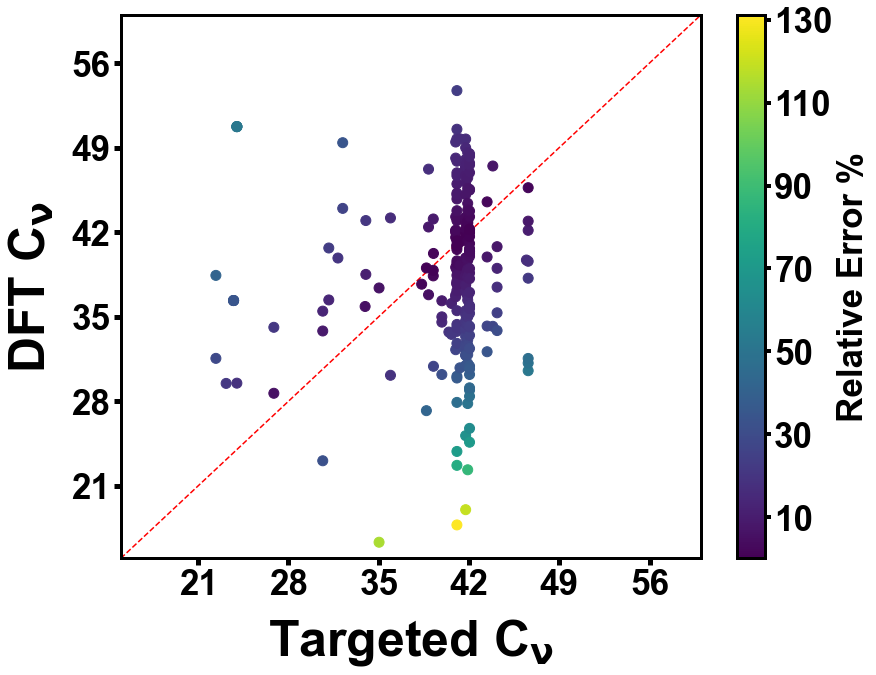

In [21]:
# Science prefers the following font
#Use a sans-serif font whenever possible (we prefer Helvetica).
mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

CV_range = (15, 60)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_cv = output["des_cv"]
DFT_cv = output["DFT_cv"]
coll = output["RE_des"]


col = np.abs((DFT_cv-Desired_cv)/DFT_cv*100)
col_orig = np.copy(col)


#plt.figure(figsize = (8, 7))
mpl.rcParams['axes.linewidth'] = 3
fig, ax = plt.subplots(figsize = (13, 10))


plt.scatter(Desired_cv, DFT_cv, s=100,c=col)

ax.tick_params(axis='both', which='major', labelsize=35, width=5)


plt.xlabel(r'Targeted C$\mathbf{_\nu}$', fontsize=50, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT C$\mathbf{_\nu}$', fontsize=50, fontname='Arial', fontweight="bold", labelpad=15)

plt.xlim(CV_range)
plt.ylim(CV_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))

lims=[CV_range[0], CV_range[1]]
plt.plot(lims, lims, '--',c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)
#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=35, fontweight='bold')
cbar.ax.tick_params(axis='both', which='major', labelsize=35, width=4, length=6)

cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(10))
cbar.solids.set_edgecolor("face")

cbar.set_ticks(np.arange(10, 131, 20))

#plt.yticks(np.linspace(ts, 0.62, 3))
#plt.draw()
ax.tick_params(axis='both', which='major', width=5, length=7)
plt.savefig('DFT_Des.pdf')
plt.savefig('DFT_Des.jpeg', dpi=1000, bbox_inches='tight')
print(len(output['des_cv']))



90
65
79


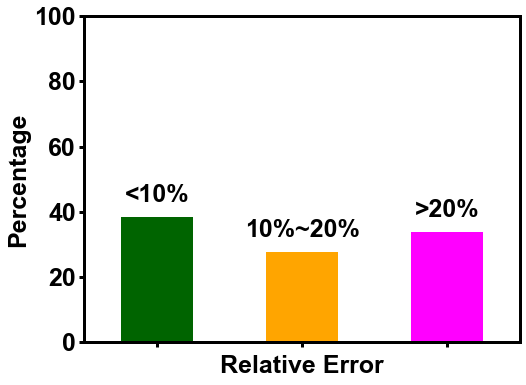

In [24]:
# make the numbers on axis bold
rc('font', weight='bold')

re_less_10 = np.sum(output['RE_des'].values < 10)
print (re_less_10)

re_less_20_big_10 = np.sum( (output['RE_des'].values > 10) &  (output['RE_des'].values < 20) )
print (re_less_20_big_10)

re_big_20 = np.sum(output['RE_des'].values > 20)
print (re_big_20)
plt.close()



plt.bar(['< 10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8, 6))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])
ax.tick_params(axis='both', which='major', labelsize=28, width=5)
rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 3, label,fontsize = 25,
            ha='center', va='bottom')
ax.set_xticklabels(x_labels)
plt.yticks(fontsize = 25)
plt.ylabel("Percentage", fontsize=25, fontweight='bold')
plt.xlabel("Relative Error", fontsize=25, fontweight='bold')
ax.tick_params(axis='both', which='major', width=3, length=5)
plt.ylim (0, 100)
plt.savefig('RE_des_dist_3part.jpeg', dpi=1000, bbox_inches='tight')